![Astrofisica Computacional](logo.png)

# Schwarzschild Geodesics 01

---

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### About this notebook

In this notebook we integrate the geodesic equations for a particle moving in the equatorial plane of a Schwarzschild spacetime

---
Differential Equations 

In [1]:
import numpy as np

def ODE(tau, q, M=1.):
    '''
    t = q[0]
    r = q[1]
    phi = q[2]
    dt/dtau = q[3]
    dr/dtau = q[4]
    dphi/dtau = q[5]
    '''
    d = 2*M - q[1] #(2M-r) 
    f = np.zeros_like(q)
    f[0] = q[3]
    f[1] = q[4]
    f[2] = q[5]
    f[3] = (2*M/(q[1]*d))*q[3]*q[4]
    f[4] = (M*d/(q[1]**3))*q[3]**2 - (M/(q[1]*d))*q[4]**2 - d*q[5]**2
    f[5] = -(2/q[1])*q[4]*q[5]
    return f


Integration using [scipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp)

In [52]:
from scipy.integrate import solve_ivp, odeint

q0 = np.array([0., 10., 0., 0.7, 0., 0.02])
tau_i = 0.
tau_f = 500.
tau_range = np.linspace(tau_i,tau_f,10000)

sol1 = solve_ivp(ODE, [tau_i,tau_f], q0, t_eval=tau_range)
sol2 = odeint(ODE, q0, tau_range, tfirst=True)

The solution is 

In [53]:
sol1.y

array([[ 0.00000000e+00,  3.50035006e-02,  7.00070028e-02, ...,
         1.20599967e+02,  1.21898413e+02,  1.25878596e+02],
       [ 1.00000000e+01,  9.99999910e+00,  9.99999640e+00, ...,
         2.05877473e+00,  2.03206864e+00,  2.00457844e+00],
       [ 0.00000000e+00,  1.00010007e-03,  2.00020050e-03, ...,
         7.03579015e+00,  7.05972385e+00,  7.08430451e+00],
       [ 7.00000000e-01,  7.00000016e-01,  7.00000063e-01, ...,
         1.96359533e+01,  3.55399953e+01,  2.45385336e+02],
       [ 0.00000000e+00, -3.60036001e-05, -7.20071988e-05, ...,
        -5.26559787e-01, -5.41716910e-01, -5.57909940e-01],
       [ 2.00000000e-02,  2.00000036e-02,  2.00000144e-02, ...,
         4.72446852e-01,  4.84946534e-01,  4.98338574e-01]])

Plot the solution. Note that we introduce cartesian coordinates $(x,y) = (r\cos\phi, r\sin \phi)$

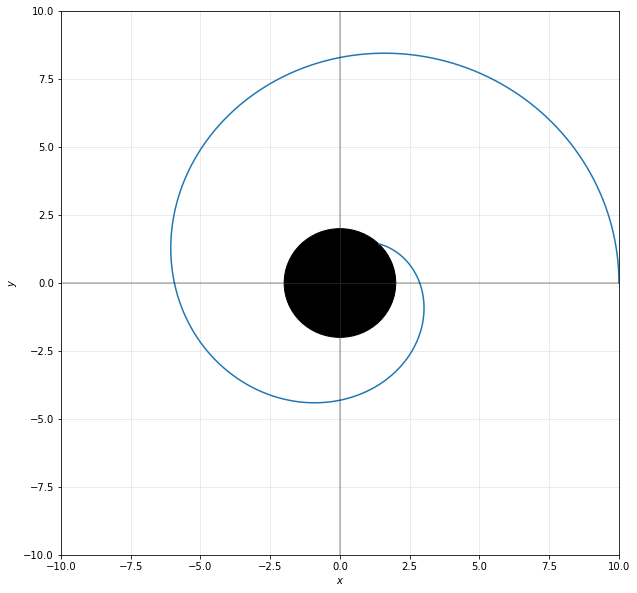

In [54]:
import matplotlib.pyplot as plt

x = sol1.y[1]*np.cos(sol1.y[2])
y = sol1.y[1]*np.sin(sol1.y[2])



fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x,y)
ax.axhline(color='k', alpha=0.3)
ax.axvline(color='k', alpha=0.3)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.grid(alpha=0.3)
# Plot the Black Hole horizon
blackHole = plt.Circle((0,0),2,color='k')
ax.add_patch(blackHole)
plt.show()

In [55]:
sol2.shape

(10000, 6)

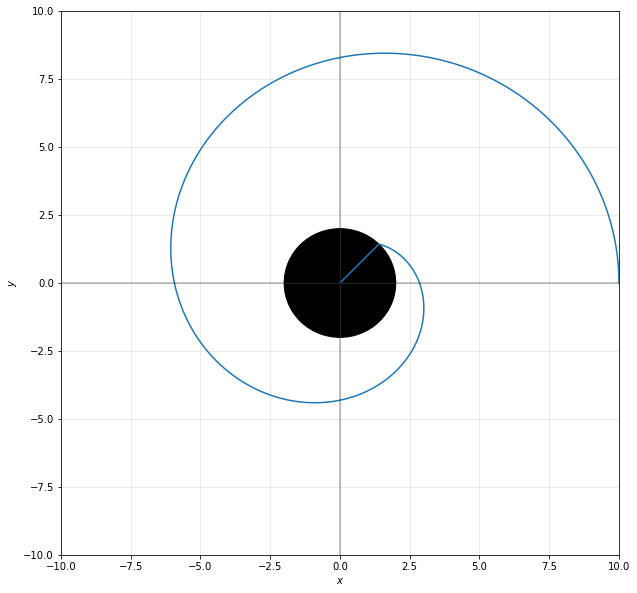

In [56]:
import matplotlib.pyplot as plt

x2 = sol2[:,1]*np.cos(sol2[:,2])
y2 = sol2[:,1]*np.sin(sol2[:,2])

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x2,y2)
ax.axhline(color='k', alpha=0.3)
ax.axvline(color='k', alpha=0.3)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.grid(alpha=0.3)
# Plot the Black Hole horizon
blackHole = plt.Circle((0,0),2,color='k')
ax.add_patch(blackHole)
plt.show()